In [2]:
import numpy, random, math
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [3]:
def kernels(x, y, fun='linear', paras=1):
    if len(x)!=len(y):
        print('2 objects should be have same length!')
        return 0
    if fun=='poly':
        return (numpy.dot(x,y)+1)**paras
    if fun=='RBF':
        return numpy.exp(-numpy.dot(x-y,x-y)/(2*paras*paras))
    return numpy.dot(x,y)

In [4]:
def objective(alpha):
    # alpha is 1xn array or list
    if not isinstance(alpha, numpy.ndarray):
        alpha = numpy.array(alpha)
    return numpy.dot(alpha, numpy.dot(alpha, P))/2 - numpy.sum(alpha)

In [5]:
def zerofun(alpha):
    if not isinstance(alpha, numpy.ndarray):
        alpha = numpy.array(alpha)
    return numpy.dot(alpha, targets)

In [6]:
def extract_nonzeros():
    return [inputs[(alpha>10**(-5))&(alpha<C-10**(-5)),:], 
            targets[(alpha>10**(-5))&(alpha<C-10**(-5))], 
            alpha[(alpha>10**(-5))&(alpha<C-10**(-5))]]

In [7]:
def find_b(index_sv):
    return numpy.dot(alpha*targets, 
              numpy.array([kernels(sv[0][index_sv,:],xi,fun,paras) for xi in inputs])) - sv[1][index_sv]

In [8]:
def indicator(s):
    return numpy.dot(alpha*targets, numpy.array([kernels(s,xi,fun,paras) for xi in inputs])) - b

In [50]:
# Generate Test Data
def generate_data(var1, var2, var3, pos1, pos2, pos3):
    classA = numpy.concatenate((numpy.random.randn(10, 2) * var1 + pos1,
                               numpy.random.randn(10, 2) * var2 + pos2))
    classB = numpy.random.randn(20, 2) * var3 + pos3

    inputs = numpy.concatenate((classA, classB))
    targets = numpy.concatenate((numpy.ones(classA.shape[0]), -numpy.ones(classB.shape[0])))

    N = inputs.shape[0]

    permute = list(range(N))
    random.shuffle(permute)
    inputs = inputs[permute, :]
    targets = targets[permute]
    return inputs, targets, classA, classB

numpy.random.seed(100)
inputs, targets, classA, classB = generate_data(0.2, 0.2, 0.5 ,[1.5, 0.2], [-1.5, 0.2], [0.0, -0.5])

In [281]:
def myfun_sin(x):
    return 0.5*(numpy.sin(3*x) - 0.3*x + 0.3) + numpy.random.randn()*0.1

In [228]:
def myfun_parabolA(x):
    return -x**2 + 1 + numpy.random.randn()*0.05

In [229]:
def myfun_parabolB(x):
    return x**2/2 - 0.3 + numpy.random.randn()*0.05

In [282]:
# Generate a difficult to separate data
def datasetA(size):
    x = numpy.array([numpy.random.rand()*2.0-1.0 for i in range(int(size/2))])
    classA = numpy.concatenate((numpy.array([[xi, myfun_parabolA(xi)] for xi in x]),
                                numpy.random.randn(20, 2) * 0.2 + [0.25, 0.25]))
    classB = numpy.array([[xi, -myfun_sin(xi)] for xi in x])
    
    inputs = numpy.concatenate((classA, classB))
    targets = numpy.concatenate((numpy.ones(classA.shape[0]), -numpy.ones(classB.shape[0])))

    N = inputs.shape[0]

    permute = list(range(N))
    random.shuffle(permute)
    inputs = inputs[permute, :]
    targets = targets[permute]
    return inputs, targets, classA, classB

In [283]:
numpy.random.seed(100)
inputs, targets, classA, classB = datasetA(200)

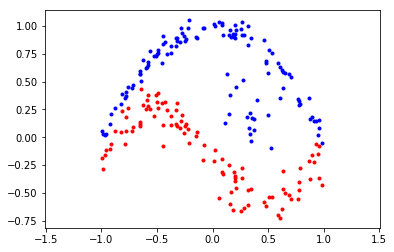

In [284]:
# Plotting
plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.')

plt.axis('equal')
#plt.savefig('svmplot_1.pdf')
plt.show()

In [291]:
fun = 'poly'
paras = 3
C = 1000
N = inputs.shape[0]
K = numpy.array([[kernels(xi, xj, fun, paras) for xi in inputs] for xj in inputs])

P = numpy.outer(targets,targets)*K

ret = minimize(objective, numpy.zeros(N), bounds=[(0,C) for b in range(N)], 
               constraints={'type':'eq', 'fun':zerofun})
alpha = ret['x']

sv = extract_nonzeros()
# alpha get from minimize strictly set C if is is over C
print(sv[2])
isv = 0
b = find_b(isv)

print(indicator([1.5, -0.5]))

[799.33633164 102.04040877 125.73436491  46.35459549 218.37174951
 851.53201569 989.55726455  61.10301047]
-111.6141792902215


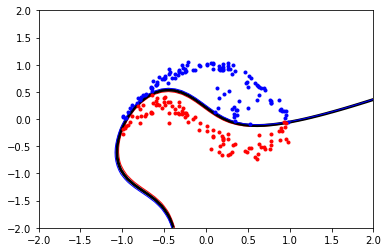

In [292]:
# Plotting the Decision Boundary
xgrid = numpy.linspace(-2, 2)
ygrid = numpy.linspace(-2, 2)

grid = numpy.array([[indicator([x, y]) for x in xgrid] for y in ygrid])

plt.contour(xgrid, ygrid, grid, (-1.0, 0.0, 1.0), colors=('red', 'black', 'blue'), linewidths=(1,3,1))
plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.')
#plt.savefig('svmclass_5_10_RBF5.pdf')
plt.show()